# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações


In [63]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})


### 1.a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

In [57]:
# a) Obtendo a média e a diferença através de uma multiplicação matricial
transform_matrix = np.array([[0.5, 0.5], [1, -1]]) # Matriz de transformação

# Cálculo da média e diferença entre p1 e p2 através de multiplicação matricial
df_transformed = pd.DataFrame(np.dot(df, transform_matrix), columns=['media', 'diferenca'])

df_transformed.head() # as primeiras linhas

,media,diferenca
0,11.425774,-4.461082
1,6.530233,-3.668840
2,2.108686,0.159828
3,7.230933,-1.717786
4,12.535747,-5.341057


### 1.b) Calcule a correlação entre os dados da **p1** e **p2**


In [58]:
correlacao_p1_p2 = df['p1'].corr(df['p2'])
print(f"Correlação entre p1 e p2: {correlacao_p1_p2}")


Correlação entre p1 e p2: 0.8957365818728046


### 1.c) Calcule a correlação entre os dados transformados (média e diferença)


In [59]:
correlacao_media_diferenca = df_media_diferenca['Media'].corr(df_media_diferenca['Diferenca'])
print(f"Correlação entre Media e Diferenca: {correlacao_media_diferenca}")


Correlação entre Media e Diferenca: 0.13347385411788837


###1.d) Comente as correlações observadas.

As observações sobre as correlações são as seguintes:

- A correlação entre `p1` e `p2` é bastante alta (**0.896**), o que faz sentido, pois `p2` foi gerado a partir de `p1` com algum ruído adicionado. Isso indica uma forte relação linear entre `p1` e `p2`.

- A correlação entre a `Média` e a `Diferença` é muito mais baixa (**0.133**), próxima de zero. Isso sugere que, após a transformação para média e diferença, essas duas variáveis se tornam quase independentes uma da outra.

> Portanto, a transformação para média e diferença foi eficaz na redução da correlação entre as duas variáveis originais (`p1` e `p2`).

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

In [79]:
# Cálculo da soma entre p1 e p2
df['soma'] = df.p1 + df.p2

# Cálculo da diferença entre p1 e p2
df['diferenca'] = df.p1 - df.p2

# Configurar o estilo do dataframe
(df.style
   .format(precision=2,  # Definir a precisão para 2 casas decimais
           decimal=',')
   .bar(subset='diferenca',  # Estilização da coluna 'diferença' com barras coloridas para visualizar valores positivos e negativos
        color=['pink', 'lightblue'],
        align='zero')
   .background_gradient(subset=['media', 'soma']))  # Estilização das colunas 'média' e 'soma' com cores de acordo com os valores



,p1,p2,soma,diferenca,media
0,"6,96","7,94","14,91","-0,98","7,45"
1,"2,86","5,10","7,96","-2,24","3,98"
2,"2,27","0,97","3,24","1,29","1,62"
3,"5,51","4,47","9,99","1,04","4,99"
4,"7,19","8,94","16,13","-1,74","8,07"
5,"4,23","3,43","7,66","0,80","3,83"
6,"9,81","9,84","19,64","-0,03","9,82"
7,"6,85","7,92","14,77","-1,07","7,38"
8,"4,81","5,70","10,51","-0,89","5,25"
9,"3,92","5,68","9,60","-1,75","4,80"


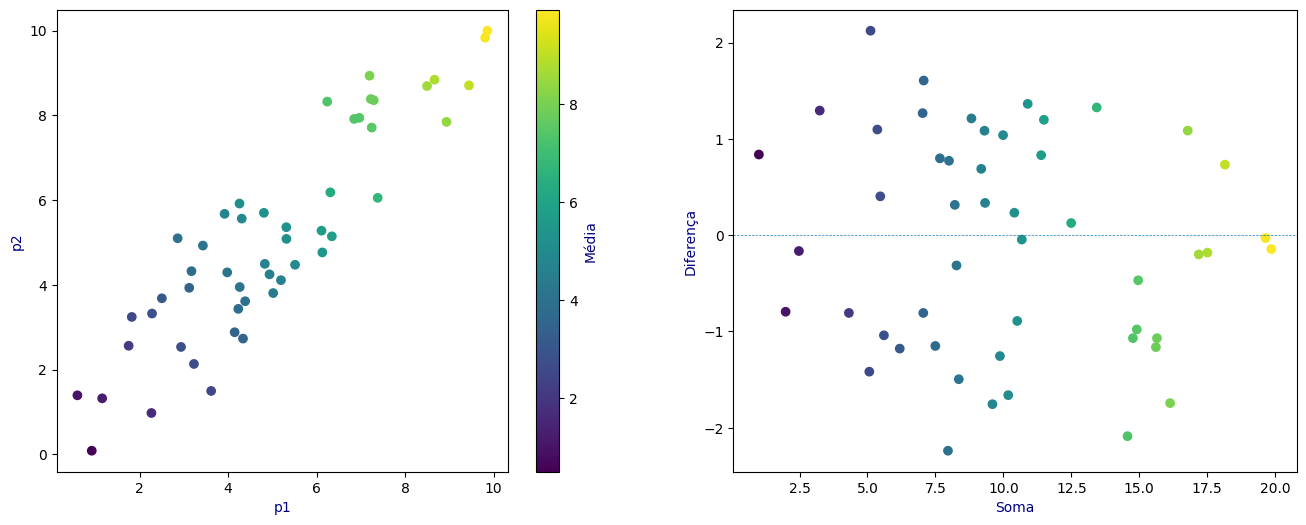

In [73]:
# Definição da figura e configuração dos eixos
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Gráfico dos valores de p1 na horizontal X p2 na vertical
scatter1 = ax[0].scatter(x=df.p1, y=df.p2, c=df['media'])
ax[0].set_xlabel('p1', color = 'navy')  # Legenda do eixo x
ax[0].set_ylabel('p2', color = 'navy')  # Legenda do eixo y

# Barra de cores para representar a média
cbar = fig.colorbar(scatter1, ax=ax[0])
cbar.set_label('Média', color = 'navy')  # Legenda da barra de cores

# Gráfico da Soma em relação a Diferença de p1 X p2
scatter2 = ax[1].scatter(x=df['soma'], y=df['diferenca'], c=df['media'])
ax[1].axhline(y=0, linewidth=0.5, linestyle='--')  # Linha horizontal no valor 0
ax[1].set_xlabel('Soma', color = 'navy')  # Legenda do eixo x
ax[1].set_ylabel('Diferença', color = 'navy')  # Legenda do eixo y

plt.show()

> A análise dos gráficos revela que as notas das provas `p1` e `p2` estão distribuídas de maneira equilibrada, sem concentração em uma faixa específica. Após a transformação para soma e diferença, a proporção entre os valores é mantida, indicando que essas operações preservam a relação entre `p1` e `p2`. Além disso, a soma das variáveis é o dobro da média, reforçando a importância da proporção na análise dos dados.